# libirary defination

In [58]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px

In [2]:
df=pd.read_csv("/kaggle/input/sales-forecasting/train.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [4]:
df.describe(include="O")

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name
count,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800
unique,4922,1230,1326,4,793,793,3,1,529,49,4,1861,3,17,1849
top,CA-2018-100111,05/09/2017,26/09/2018,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,California,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope
freq,14,38,34,5859,35,35,5101,9800,891,1946,3140,19,5909,1492,47


In [5]:
df.describe(exclude ="O").round()

,Row ID,Postal Code,Sales
count,9800.0,9789.0,9800.0
mean,4900.0,55273.0,231.0
std,2829.0,32041.0,627.0
min,1.0,1040.0,0.0
25%,2451.0,23223.0,17.0
50%,4900.0,58103.0,54.0
75%,7350.0,90008.0,211.0
max,9800.0,99301.0,22638.0


In [6]:
df.columns.to_list()

['Row ID',
 'Order ID',
 'Order Date',
 'Ship Date',
 'Ship Mode',
 'Customer ID',
 'Customer Name',
 'Segment',
 'Country',
 'City',
 'State',
 'Postal Code',
 'Region',
 'Product ID',
 'Category',
 'Sub-Category',
 'Product Name',
 'Sales']

In [7]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


# Handdel null


In [8]:
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880
9798,9799,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


In [9]:
df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [10]:
df["Postal Code"]

0       42420.0
1       42420.0
2       90036.0
3       33311.0
4       33311.0
         ...   
9795    60610.0
9796    43615.0
9797    43615.0
9798    43615.0
9799    43615.0
Name: Postal Code, Length: 9800, dtype: float64

In [11]:
df.Region

0         South
1         South
2          West
3         South
4         South
         ...   
9795    Central
9796       East
9797       East
9798       East
9799       East
Name: Region, Length: 9800, dtype: object

In [12]:
df[df["Postal Code"].isnull()]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
2234,2235,CA-2018-104066,05/12/2018,10/12/2018,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5274,5275,CA-2016-162887,07/11/2016,09/11/2016,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8798,8799,US-2017-150140,06/04/2017,10/04/2017,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9146,9147,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9147,9148,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
9148,9149,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9386,9387,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92
9387,9388,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28
9388,9389,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
9389,9390,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04


In [13]:
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880
9798,9799,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


In [14]:
x=df["Sales"].mean()

In [15]:
df.fillna(value=5401.0,axis=1,inplace=True)

In [16]:
df.isna().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

In [17]:
df.duplicated().sum()

0

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Row ID         9800 non-null   object
 1   Order ID       9800 non-null   object
 2   Order Date     9800 non-null   object
 3   Ship Date      9800 non-null   object
 4   Ship Mode      9800 non-null   object
 5   Customer ID    9800 non-null   object
 6   Customer Name  9800 non-null   object
 7   Segment        9800 non-null   object
 8   Country        9800 non-null   object
 9   City           9800 non-null   object
 10  State          9800 non-null   object
 11  Postal Code    9800 non-null   object
 12  Region         9800 non-null   object
 13  Product ID     9800 non-null   object
 14  Category       9800 non-null   object
 15  Sub-Category   9800 non-null   object
 16  Product Name   9800 non-null   object
 17  Sales          9800 non-null   object
dtypes: object(18)
memory usage: 

In [19]:
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.798
9796,9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.368
9797,9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.188
9798,9799,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.376


In [20]:
df["Order Date"] = pd.to_datetime(df["Order Date"], format='%d/%m/%Y')

In [21]:
df["Ship Date"] = pd.to_datetime(df["Ship Date"], format='%d/%m/%Y')

In [22]:
df.dtypes

Row ID                   object
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code              object
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                    object
dtype: object

In [23]:
df[["Order Date",'Ship Date']].describe().T

,count,mean,min,25%,50%,75%,max
Order Date,9800,2017-05-01 05:13:51.673469440,2015-01-03 00:00:00,2016-05-24 00:00:00,2017-06-26 00:00:00,2018-05-15 00:00:00,2018-12-30 00:00:00
Ship Date,9800,2017-05-05 04:17:52.653061120,2015-01-07 00:00:00,2016-05-27 18:00:00,2017-06-29 00:00:00,2018-05-19 00:00:00,2019-01-05 00:00:00


In [24]:
df["month"]=df["Order Date"].dt.month

In [25]:
df["year"]=df["Order Date"].dt.year

In [26]:
df["month_ship"]=df["Ship Date"].dt.month

In [27]:
df["year_ship"]=df["Ship Date"].dt.year

In [73]:
df.sample(4)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product ID,Category,Sub-Category,Product Name,Sales,month,year,month_ship,year_ship,Order Day
9468,9469,CA-2018-102925,2018-11-05,2018-11-10,Second Class,CD-12280,Christina DeMoss,Consumer,United States,New York City,...,OFF-PA-10001870,Office Supplies,Paper,Xerox 202,12.96,11,2018,11,2018,5
8413,8414,CA-2017-147109,2017-12-17,2017-12-21,Standard Class,AH-10075,Adam Hart,Corporate,United States,Arlington,...,OFF-PA-10001972,Office Supplies,Paper,Xerox 214,51.84,12,2017,12,2017,17
1640,1641,CA-2017-157266,2017-05-26,2017-06-01,Standard Class,TB-21280,Toby Braunhardt,Consumer,United States,Washington,...,OFF-PA-10004675,Office Supplies,Paper,Telephone Message Books with Fax/Mobile Sectio...,12.7,5,2017,6,2017,26
1704,1705,CA-2017-106306,2017-03-08,2017-03-08,Same Day,PG-18820,Patrick Gardner,Consumer,United States,Glendale,...,OFF-BI-10003676,Office Supplies,Binders,"GBC Standard Recycled Report Covers, Clear Pla...",9.702,3,2017,3,2017,8


# Data Exploration 

In [29]:
ship_count=df["Category"].value_counts()

In [30]:
ship_count

Category
Office Supplies    5909
Furniture          2078
Technology         1813
Name: count, dtype: int64

In [31]:
df.groupby(["Category"])[["Sales"]].sum().sort_values("Sales")

,Sales
Category,
Office Supplies,705422.334
Furniture,728658.5757
Technology,827455.873


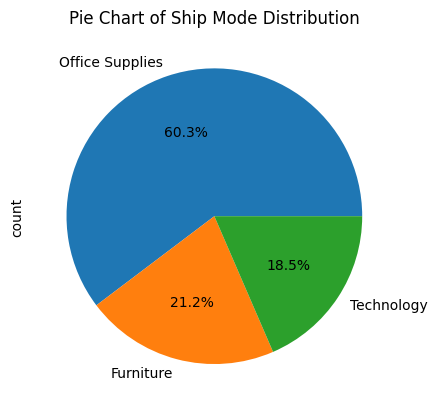

In [32]:
ship_count.plot(kind="pie",autopct="%1.1f%%")
plt.title("Pie Chart of Ship Mode Distribution")
plt.show()

In [33]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'month', 'year', 'month_ship', 'year_ship'],
      dtype='object')

In [78]:
top_customer_sales = df.groupby(["Customer Name"])[["Sales"]].sum().sort_values("Sales")

<Axes: xlabel='Customer Name'>

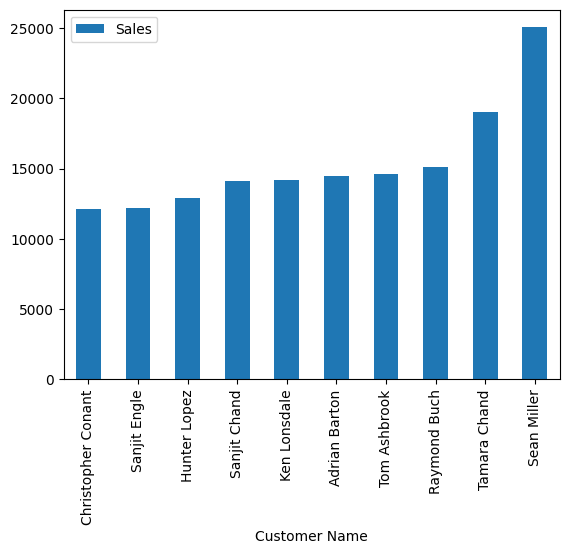

In [83]:
top_customer_sales.tail(10).plot(kind="bar")

**customer**

# top 10 _state_sales

In [34]:
top_state_sales = df.groupby(["State","Region"])[["Sales"]].sum().sort_values("Sales")

In [35]:
top_state_sales.tail(10)

,,Sales
State,Region,
Virginia,South,70636.72
Ohio,East,75130.35
Michigan,Central,76136.074
Illinois,Central,79236.517
Florida,South,88436.532
Pennsylvania,East,116276.65
Washington,West,135206.85
Texas,Central,168572.5322
New York,East,306361.147


In [80]:
top_product_sales = df.groupby(["Product Name"])[["Sales"]].sum().sort_values("Sales")

In [82]:
top_product_sales.tail(10)

,Sales
Product Name,
High Speed Automatic Electric Letter Opener,17030.312
GBC DocuBind P400 Electric Binding System,17965.068
"HP Designjet T520 Inkjet Large Format Printer - 24"" Color",18374.895
Hewlett Packard LaserJet 3310 Copier,18839.686
GBC Ibimaster 500 Manual ProClick Binding System,19024.5
GBC DocuBind TL300 Electric Binding System,19823.479
HON 5400 Series Task Chairs for Big and Tall,21870.576
Cisco TelePresence System EX90 Videoconferencing Unit,22638.48
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,27453.384


# top 10 state &  sales

<Axes: xlabel='State,month'>

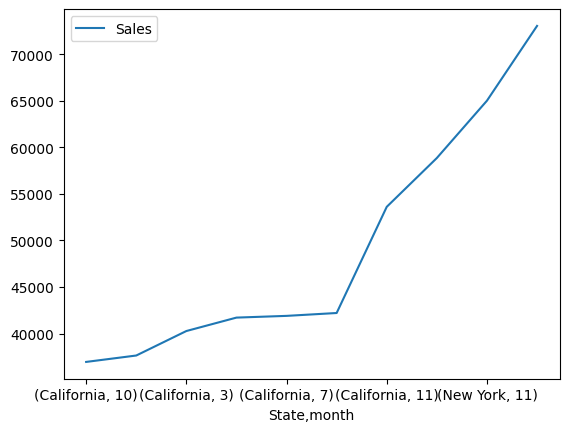

In [36]:
df.groupby(["State","month"])[["Sales"]].sum().sort_values("Sales").tail(10).plot()

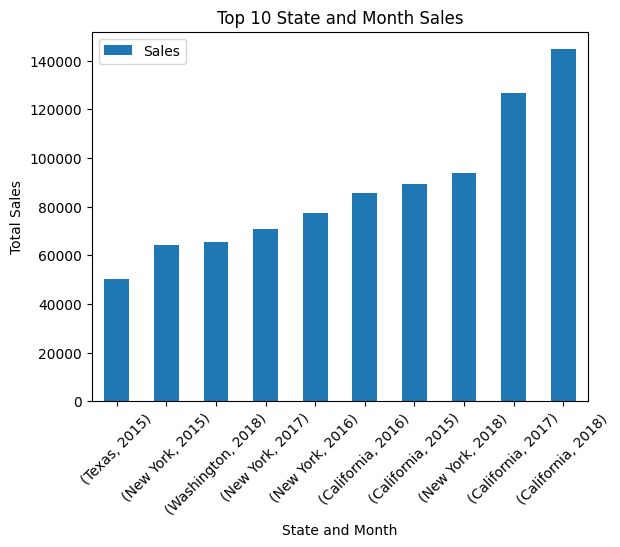

In [37]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
top_10_sales = df.groupby(["State", "year"])[["Sales"]].sum().sort_values("Sales").tail(10)

# Plotting
top_10_sales.plot(kind="bar")
plt.xticks(rotation=45)  # Rotate the x-axis labels by 45 degrees
plt.title('Top 10 State and Month Sales')
plt.ylabel('Total Sales')
plt.xlabel('State and Month')
plt.show()


In [38]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,month,year,month_ship,year_ship
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,11,2017,11,2017
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,11,2017,11,2017
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,6,2017,6,2017
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,10,2016,10,2016
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.368,10,2016,10,2016


In [39]:
# pivot_df=grouped_data.pivot(index="Segment",columns="Category",values="Sales")
# pivot_df

<Axes: xlabel='Category', ylabel='Sales'>

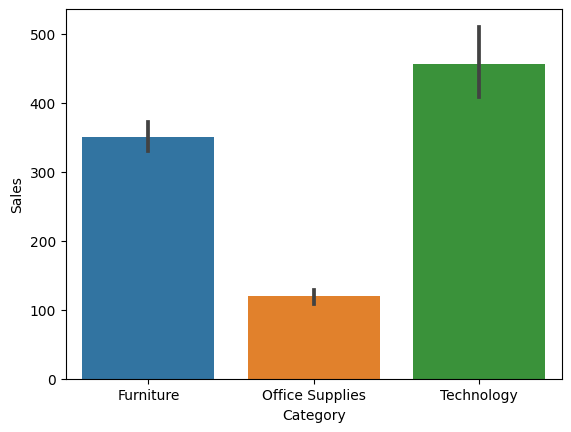

In [40]:
sns.barplot(x='Category', y='Sales', data=df, palette='tab10')

In [48]:
df.groupby(["Category"])[["Sales"]].sum().sort_values("Sales")

,Sales
Category,
Office Supplies,705422.334
Furniture,728658.5757
Technology,827455.873


In [43]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'month', 'year', 'month_ship', 'year_ship'],
      dtype='object')

<Axes: xlabel='Category', ylabel='Sales'>

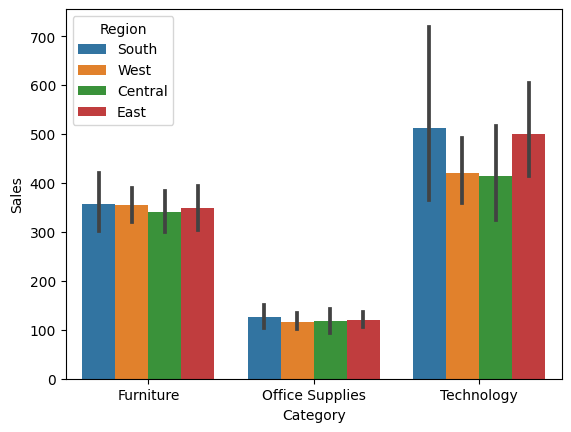

In [46]:
sns.barplot(x='Category', y='Sales', data=df, palette='tab10',hue ="Region")

<Axes: xlabel='Region', ylabel='count'>

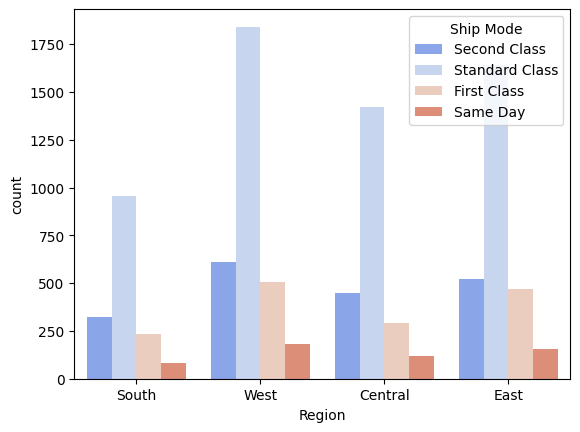

In [41]:
sns.countplot(x=df["Region"],hue=df["Ship Mode"],palette="coolwarm")

<Axes: xlabel='Region', ylabel='Sales'>

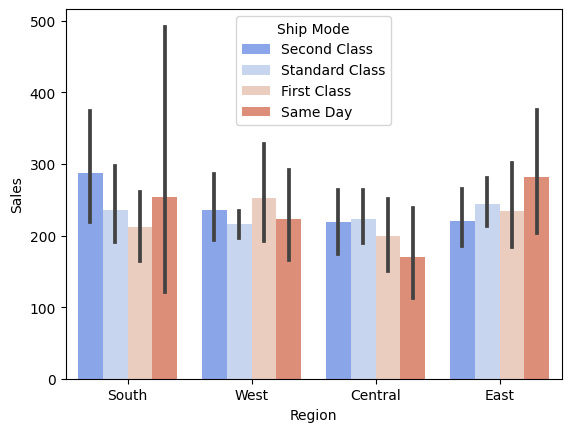

In [47]:
sns.barplot(x=df["Region"],hue=df["Ship Mode"],palette="coolwarm",y=df["Sales"])

In [49]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'month', 'year', 'month_ship', 'year_ship'],
      dtype='object')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'Bookcases'),
  Text(1, 0, 'Chairs'),
  Text(2, 0, 'Labels'),
  Text(3, 0, 'Tables'),
  Text(4, 0, 'Storage'),
  Text(5, 0, 'Furnishings'),
  Text(6, 0, 'Art'),
  Text(7, 0, 'Phones'),
  Text(8, 0, 'Binders'),
  Text(9, 0, 'Appliances'),
  Text(10, 0, 'Paper'),
  Text(11, 0, 'Accessories'),
  Text(12, 0, 'Envelopes'),
  Text(13, 0, 'Fasteners'),
  Text(14, 0, 'Supplies'),
  Text(15, 0, 'Machines'),
  Text(16, 0, 'Copiers')])

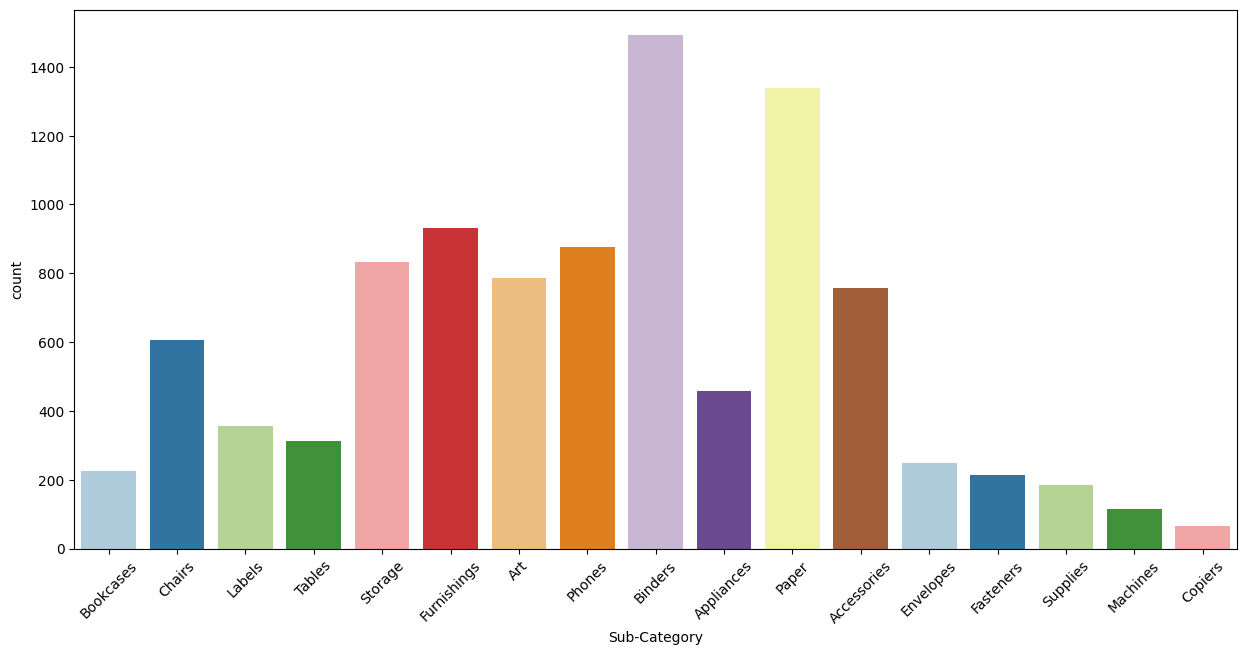

In [53]:
plt.figure(figsize=(15,7))
sns.countplot(data=df,x="Sub-Category",palette='Paired')
plt.xticks(rotation=45) # to increse the distance between each bar so it will be more clear
plt.title(distribution)

Text(0.5, 1.0, 'distribution of sub-category')

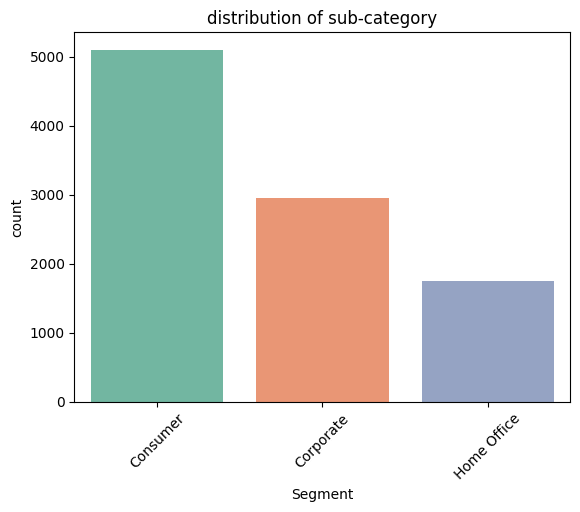

In [57]:

sns.countplot(data=df,x="Segment",palette='Set2')
plt.xticks(rotation=45) # to increse the distance between each bar so it will be more clear
plt.title('distribution of sub-category')

In [59]:
fig= px.pie(df,values='Sales', names="Category", title="Category")

In [60]:
fig

In [61]:
fig= px.pie(df,values="Sales",names="Category",title="Category",color="Category",color_discrete_map={
                                 'Office Supplies':'cyan',
                                 'Furniture':'royalblue',
                                 'Technology':'darkblue'})

In [63]:
fig.show()

In [66]:
scatter_plot=px.scatter(df,x="Sub-Category",y="Sales",title="sales vs sub category",color="Segment")
scatter_plot.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [67]:
scatter_plot=px.scatter(df,x="Sub-Category",y="Sales",title="sales vs sub category",color="Category")
scatter_plot.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [68]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'month', 'year', 'month_ship', 'year_ship'],
      dtype='object')

<Axes: xlabel='month'>

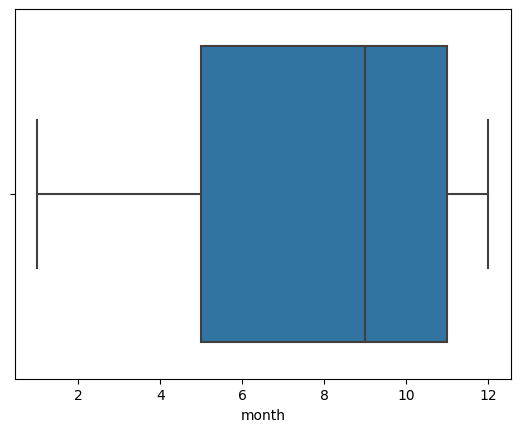

In [69]:
sns.boxplot(x="month", data=df)

In [72]:
df["Order Day"]=df["Order Date"].dt.day

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:1794: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:1794: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:1794: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Axes: xlabel='Sales', ylabel='Category'>

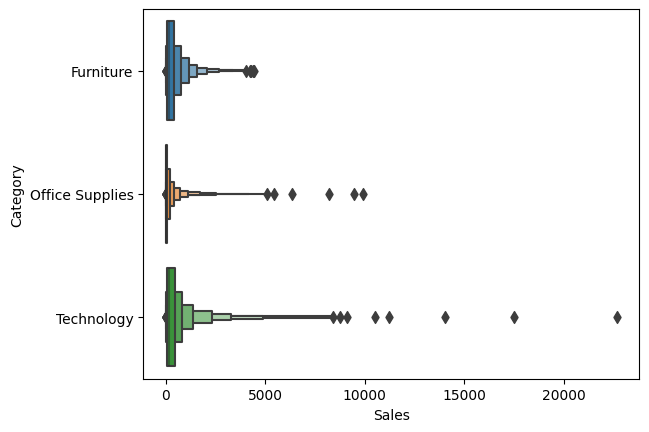

In [74]:
sns.boxenplot(x=df["Sales"],y=df["Category"])

In [75]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'month', 'year', 'month_ship', 'year_ship',
       'Order Day'],
      dtype='object')